In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

from longitudinal_arm_swing.constants import PATH_IDS, PATH_PREPARED_DATA
from longitudinal_arm_swing.util import print_clinical_exclusions_table

ids_excluded_by_category_filename = 'ids_excluded_by_category.json'
ids_remaining_filename = 'ids_remaining_after_exclusions.json'
dataset_ids_filename = 'dataset_ids.json'
med_info_filename = 'med_info_ids.json'
digital_measures_filename = 'digital_measures.parquet'

with open(os.path.join(PATH_IDS, ids_excluded_by_category_filename), 'r') as f: # type: ignore
    ids_excluded_by_category = json.load(f)

with open(os.path.join(PATH_IDS, ids_remaining_filename), 'r') as f:
    ids_remaining = json.load(f)

with open(os.path.join(PATH_IDS, dataset_ids_filename), 'r') as f:
    dataset_ids = json.load(f)

with open(os.path.join(PATH_IDS, med_info_filename), 'r') as f:
    med_info_ids = json.load(f)

digital_measures = pd.read_parquet(os.path.join(PATH_PREPARED_DATA, 'measures', digital_measures_filename))

In [2]:
analyses = ['cs', 'icc', 'l1tf', 'srm', 'regr']

print_clinical_exclusions_table(ids_excluded_by_category, dataset_ids, med_info_ids, analyses)

---- Analysis: Cross-sectional ----

Clinical Exclusions:
+------------------------------------+-----+--------+----------+
|              Category              | ppp | denovo | controls |
+------------------------------------+-----+--------+----------+
|  Starting number of participants   | 520 |  103   |    50    |
|              --------              | --- | ------ | -------- |
|            Walking aid             | 54  |   4    |    0     |
|  At least significant dyskinesia   | 15  |   0    |    0     |
|         Watch side unknown         |  0  |   0    |    0     |
|          No clinical data          |  0  |   0    |    0     |
|              --------              | --- | ------ | -------- |
| Remaining after clinical exclusion | 452 |   99   |    50    |
+------------------------------------+-----+--------+----------+


Measurements Exclusions:
+-----------------------------------------------+-----+--------+----------+
|                   Category                    | ppp | den

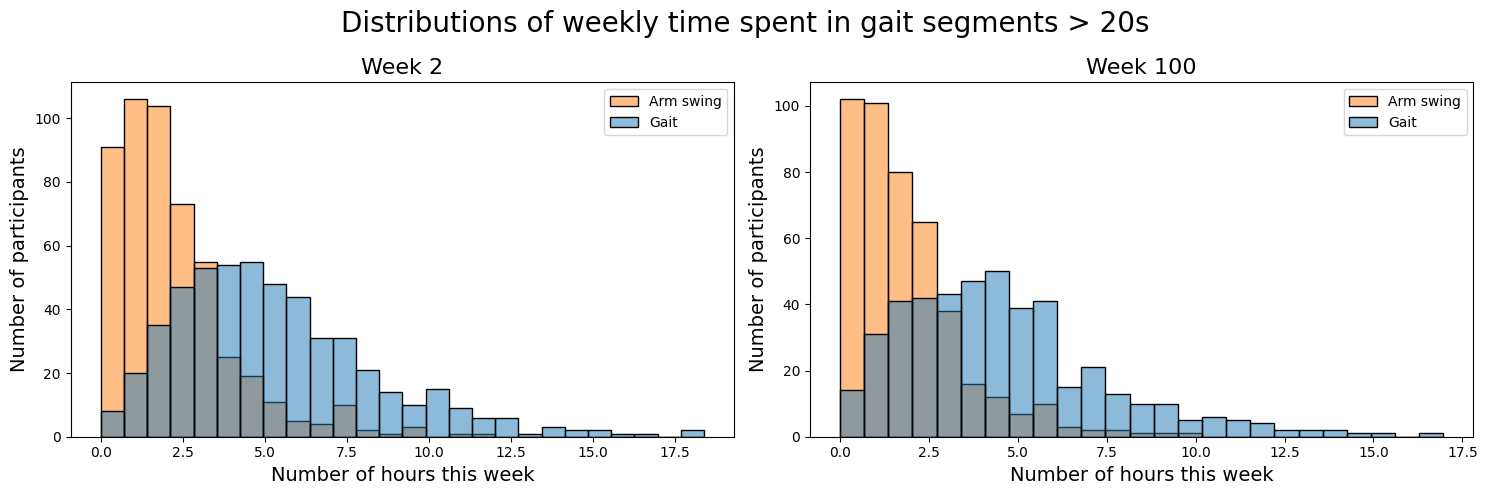

In [3]:
import seaborn as sns

segment_length = 'very_long'

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

for i, week in enumerate([2, 100]):

    ax[i].set_title(f'Week {week}', size=16)
    ax[i].set_xlabel(f'Number of hours this week', size=14)
    ax[i].set_ylabel('Number of participants', size=14)

    df_plot = digital_measures.loc[
        (digital_measures['population']=='pd') &
        (digital_measures['week']==week) &
        (digital_measures['segment_category']==segment_length)
    ].copy()

    df_plot['duration_h'] = df_plot['duration_s'] / 3600

    sns.histplot(df_plot, x='duration_h', hue='filter_type', ax=ax[i], alpha=0.5)
    
    ax[i].legend(labels=['Arm swing', 'Gait'])
    
    # df_plot.apply(lambda x: x/3600).hist(ax=ax[i], weights=np.ones(len(df_plot)) / len(df_plot))

fig.suptitle(f'Distributions of weekly time spent in gait segments > 20s', size=20)
plt.tight_layout()
plt.show()